In [2]:
import pandas as pd
from sklearn.decomposition import NMF
import numpy as np
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Update/Create Dataset

In [ ]:
shoe_interactions = pd.read_csv('shoe_interactions.csv')


num_rows_to_add = np.random.randint(50, 101)

# Starting interaction_id for new entries
start_interaction_id = 501

# Generate new rows
new_data = {
    'interaction_id': range(start_interaction_id, start_interaction_id + num_rows_to_add),
    'id_user': np.random.randint(1, shoe_interactions['id_user'].max() + 1, size=num_rows_to_add),
    'shoe_detail_id': np.random.randint(1, 51, size=num_rows_to_add),
    'interaction_type': np.random.choice(['view', 'wishlist'], size=num_rows_to_add),
    'interaction_date': (pd.to_datetime('now') - pd.to_timedelta(np.random.randint(1, 1000, size=num_rows_to_add), unit='h')).strftime('%m/%d/%Y %H:%M')
}

# Create a DataFrame for the new rows
new_rows_df = pd.DataFrame(new_data)

# Append new rows to the existing dataset
shoe_interactions_updated = pd.concat([shoe_interactions, new_rows_df], ignore_index=True)

# Save the updated dataset to a new CSV file
shoe_interactions_updated.to_csv('shoe_interactions_updated.csv', index=False)

print("New data added successfully. Updated dataset saved as 'shoe_interactions_updated.csv'.")


New data added successfully. Updated dataset saved as 'shoe_interactions_updated.csv'.


# Load Dataset

In [4]:
sepatu_list = pd.read_csv("sepatu_list.csv")
shoe_interactions = pd.read_csv("shoe_interactions.csv")

# Exploratory Data Analysis

In [ ]:
# Initial data overview
print("Sepatu List Dataset:")
display(sepatu_list.info())
display(sepatu_list.head())

print("\nShoe Interactions Dataset:")
display(shoe_interactions.info())
display(shoe_interactions.head())

Sepatu List Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sepatu_id        50 non-null     int64 
 1   nama_sepatu      50 non-null     object
 2   kategori_sepatu  50 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


None

,sepatu_id,nama_sepatu,kategori_sepatu
0,1,Nokha Boots Harlow Black,Boots
1,2,AXEL BROWN Chelsea High Boots,Boots
2,3,AP Boots Terra Eco,Boots
3,4,Azcost Allison Original,Boots
4,5,Parabellum COBRA,Boots



Shoe Interactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   interaction_id    500 non-null    int64 
 1   id_user           500 non-null    int64 
 2   shoe_detail_id    500 non-null    int64 
 3   interaction_type  500 non-null    object
 4   interaction_date  500 non-null    object
dtypes: int64(3), object(2)
memory usage: 19.7+ KB


None

,interaction_id,id_user,shoe_detail_id,interaction_type,interaction_date
0,1,1,33,wishlist,10/23/2024 14:53
1,2,13,16,view,10/23/2024 23:13
2,3,2,37,wishlist,10/22/2024 10:42
3,4,8,30,view,10/22/2024 9:13
4,5,19,45,view,10/22/2024 19:19


In [ ]:
# Checking for missing values
print("\nMissing values in sepatu_list:")
print(sepatu_list.isnull().sum())

print("\nMissing values in shoe_interactions:")
print(shoe_interactions.isnull().sum())

# Basic statistics of interaction data
print("\nStatistical Summary of Shoe Interactions:")
display(shoe_interactions.describe())


Missing values in sepatu_list:
sepatu_id          0
nama_sepatu        0
kategori_sepatu    0
dtype: int64

Missing values in shoe_interactions:
interaction_id      0
id_user             0
shoe_detail_id      0
interaction_type    0
interaction_date    0
dtype: int64

Statistical Summary of Shoe Interactions:


,interaction_id,id_user,shoe_detail_id
count,500.000000,500.000000,500.000000
mean,250.500000,10.378000,24.836000
std,144.481833,5.487745,14.506757
min,1.000000,1.000000,1.000000
25%,125.750000,6.000000,12.000000
50%,250.500000,10.000000,25.000000
75%,375.250000,15.000000,37.000000
max,500.000000,20.000000,50.000000


<ipython-input-6-f80e3ee0bba4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=shoe_interactions, x='interaction_type', palette='viridis')


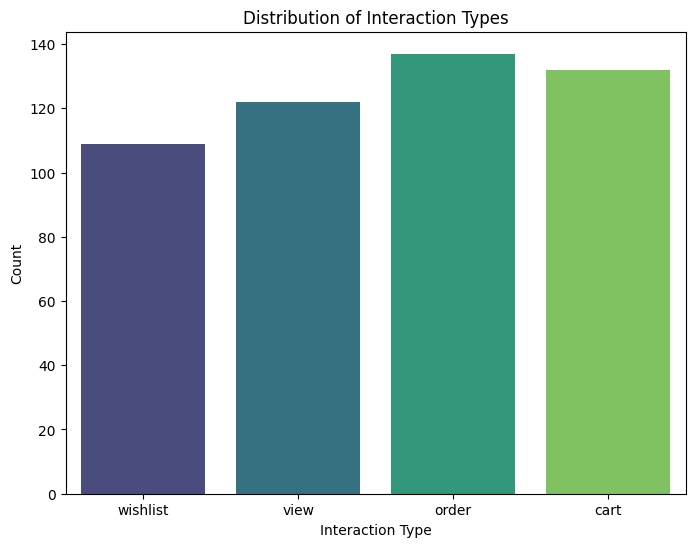

In [ ]:
# Plot distribution of interaction types
plt.figure(figsize=(8, 6))
sns.countplot(data=shoe_interactions, x='interaction_type', palette='viridis')
plt.title("Distribution of Interaction Types")
plt.xlabel("Interaction Type")
plt.ylabel("Count")
plt.show()

<ipython-input-7-c9e61626c864>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='Blues_d')


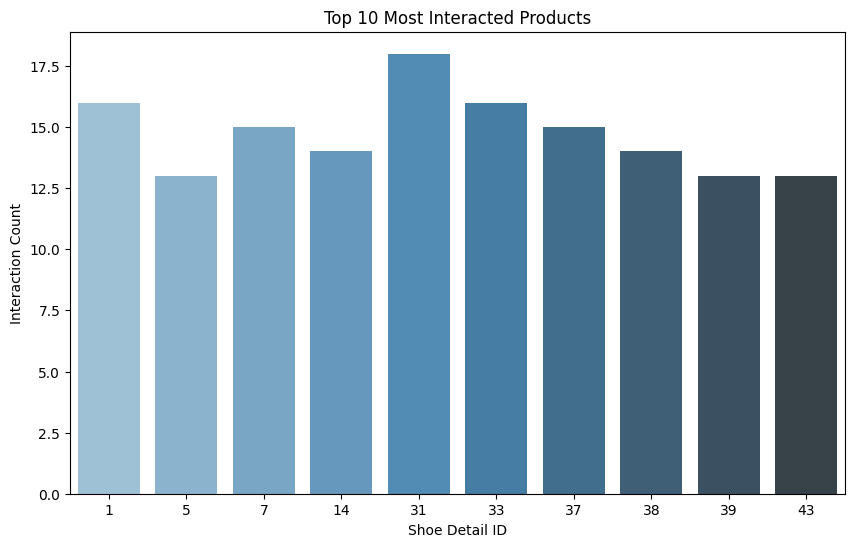

In [ ]:
# Check popular products based on interaction count
top_products = shoe_interactions['shoe_detail_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='Blues_d')
plt.title("Top 10 Most Interacted Products")
plt.xlabel("Shoe Detail ID")
plt.ylabel("Interaction Count")
plt.show()


Timestamp column after conversion:
0   2024-10-23 14:53:00
1   2024-10-23 23:13:00
2   2024-10-22 10:42:00
3   2024-10-22 09:13:00
4   2024-10-22 19:19:00
Name: interaction_date, dtype: datetime64[ns]


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


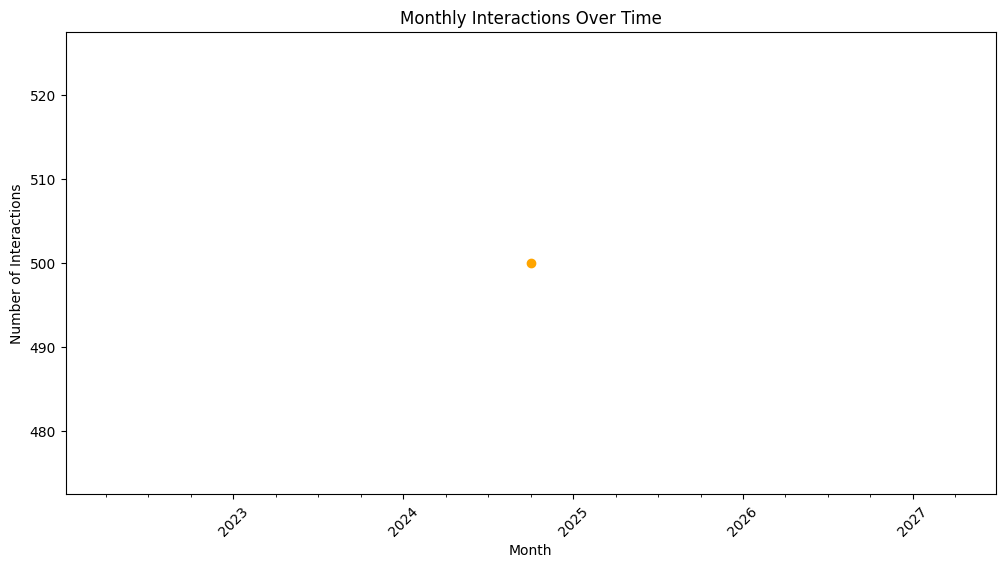

In [ ]:
# Distribution of interactions over time (if timestamp is available)
shoe_interactions['interaction_date'] = pd.to_datetime(shoe_interactions['interaction_date'], format='%m/%d/%Y %H:%M')

# Confirm the conversion was successful
print("\nTimestamp column after conversion:")
print(shoe_interactions['interaction_date'].head())

# Extracting month and year for monthly trend analysis
shoe_interactions['month'] = shoe_interactions['interaction_date'].dt.to_period("M")

# Now we can analyze interactions over time
monthly_interactions = shoe_interactions.groupby('month').size()

plt.figure(figsize=(12, 6))
monthly_interactions.plot(kind='line', marker='o', color='orange')
plt.title("Monthly Interactions Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Interactions")
plt.xticks(rotation=45)
plt.show()

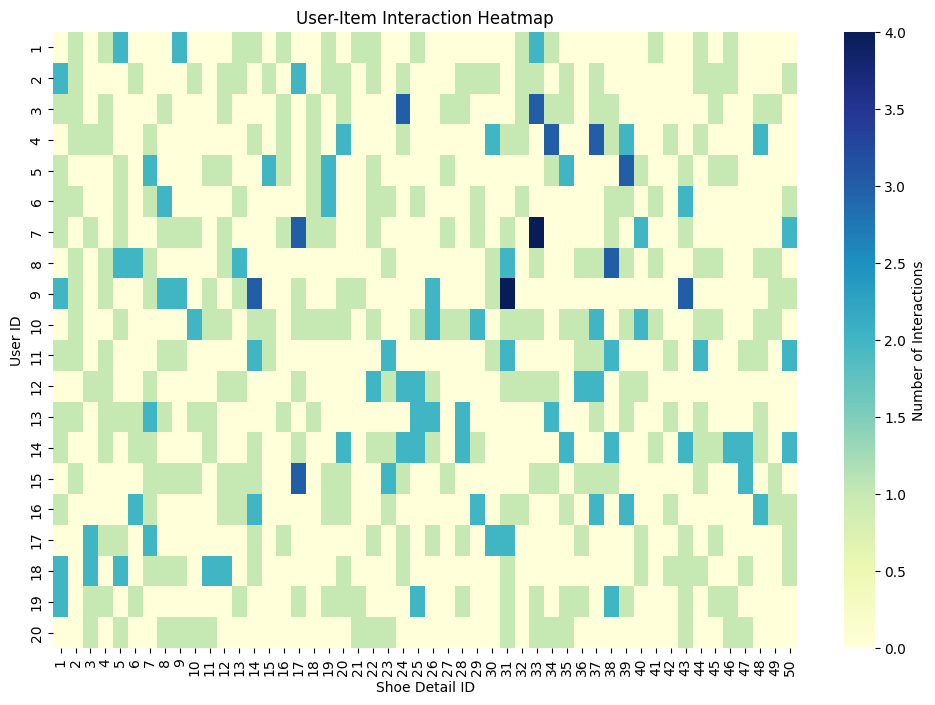

In [ ]:
# Interaction heatmap between users and items
user_item_matrix = shoe_interactions.pivot_table(index='id_user', columns='shoe_detail_id', values='interaction_type', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(user_item_matrix, cmap="YlGnBu", cbar_kws={'label': 'Number of Interactions'})
plt.title("User-Item Interaction Heatmap")
plt.xlabel("Shoe Detail ID")
plt.ylabel("User ID")
plt.show()

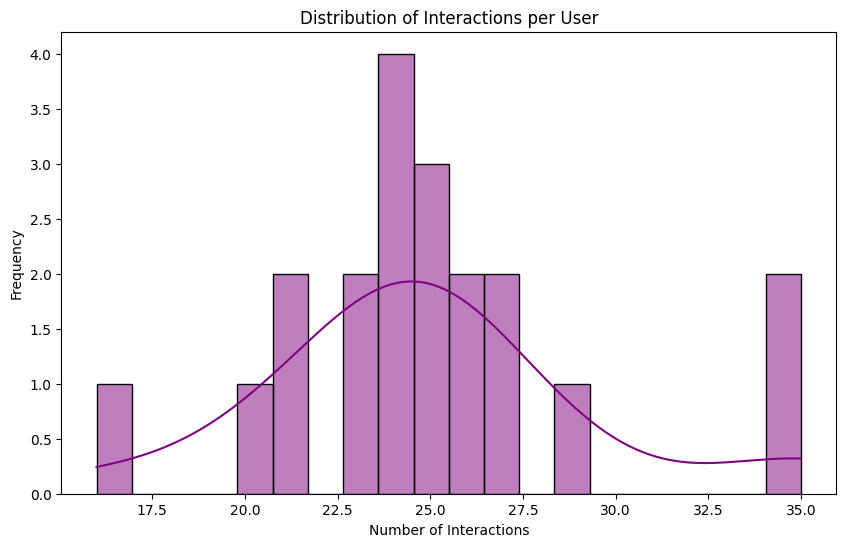

In [ ]:
# Analyze user behavior - interactions per user
interactions_per_user = shoe_interactions['id_user'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(interactions_per_user, bins=20, kde=True, color='purple')
plt.title("Distribution of Interactions per User")
plt.xlabel("Number of Interactions")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Average number of interactions by type
interaction_type_avg = shoe_interactions.groupby('interaction_type')['id_user'].count() / len(shoe_interactions['id_user'].unique())
print("\nAverage Interactions per User by Interaction Type:")
print(interaction_type_avg)


Average Interactions per User by Interaction Type:
interaction_type
cart        6.60
order       6.85
view        6.10
wishlist    5.45
Name: id_user, dtype: float64


<ipython-input-12-18043de8c064>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')


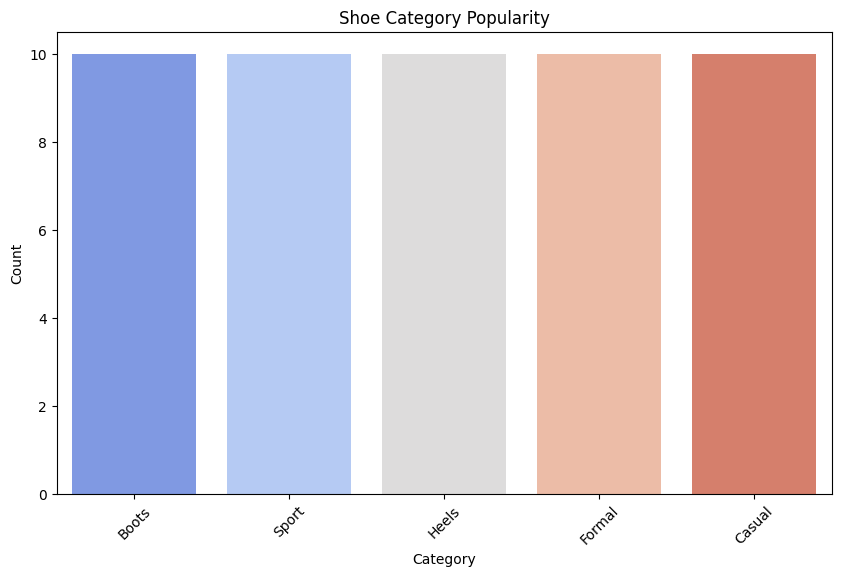

In [ ]:
# Shoe category popularity (assuming 'category' is available in sepatu_list)
if 'kategori_sepatu' in sepatu_list.columns:
    category_counts = sepatu_list['kategori_sepatu'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')
    plt.title("Shoe Category Popularity")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Data Training

In [5]:
# Merge and preprocess datasets
merged_data = pd.merge(shoe_interactions, sepatu_list, left_on='shoe_detail_id', right_on='sepatu_id')
interaction_map = {'view': 1, 'wishlist': 2, 'order': 3, 'cart': 4}
merged_data['interaction_value'] = merged_data['interaction_type'].map(interaction_map)
user_item_matrix = merged_data.pivot_table(index='id_user', columns='shoe_detail_id', values='interaction_value', fill_value=0)

# Ensure there are no NaN values in user-item matrix
user_item_matrix = user_item_matrix.fillna(0)

# Train collaborative filtering model using NMF
model = NMF(n_components=15, init='random', random_state=0)
W = model.fit_transform(user_item_matrix)
H = model.components_

In [6]:
# Recommendation function for both new and existing users
def recommend_items(user_id, W, H, user_item_matrix, product_df, top_n=10, new_user=False):
    if new_user:
        # For a new user, recommend top popular items based on existing user interactions
        item_popularity = user_item_matrix.sum(axis=0).sort_values(ascending=False)
        popular_item_ids = item_popularity.index[:top_n]
        recommended_products = product_df[product_df['sepatu_id'].isin(popular_item_ids)][['sepatu_id', 'nama_sepatu']]
    else:
        # For an existing user, recommend items based on learned preferences
        user_index = user_item_matrix.index.get_loc(user_id)
        scores = W[user_index].dot(H)
        item_indices = np.argsort(scores)[::-1][:top_n]
        recommended_ids = user_item_matrix.columns[item_indices]
        recommended_products = product_df[product_df['sepatu_id'].isin(recommended_ids)][['sepatu_id', 'nama_sepatu']]
    return recommended_products

In [32]:
# Evaluation metrics
def precision_at_k(actual_items, recommended_items, k):
    recommended_at_k = recommended_items[:k]
    hits = len(set(actual_items) & set(recommended_at_k))
    return hits / k

def recall_at_k(actual_items, recommended_items, k):
    recommended_at_k = recommended_items[:k]
    hits = len(set(actual_items) & set(recommended_at_k))
    return hits / len(actual_items) if actual_items else 0

def mean_average_precision_at_k(actual_items, recommended_items, k):
    recommended_at_k = recommended_items[:k]
    binary_relevance = [1 if item in actual_items else 0 for item in recommended_at_k]
    return average_precision_score(binary_relevance, binary_relevance)

def accuracy_at_k(actual_items, recommended_items, k=10):
    if not actual_items:
        return 0
    recommended_at_k = recommended_items[:k]
    hits = len(set(recommended_at_k) & set(actual_items))
    accuracy = hits / len(actual_items)
    return accuracy

In [20]:
# Function to update recommendations as the user interacts
def update_user_recommendations(user_id, user_item_matrix, interaction, item_id, W, H, product_df, top_n=10):
    # Update the user-item matrix with the new interaction
    user_item_matrix.loc[user_id, item_id] = interaction

    # Ensure no NaNs are present after the update
    user_item_matrix = user_item_matrix.fillna(0)

    # Retrain the model with the updated user-item matrix
    W = model.fit_transform(user_item_matrix)
    H = model.components_

    # Get updated recommendations for the user
    recommendations = recommend_items(user_id, W, H, user_item_matrix, product_df, top_n=top_n)
    return recommendations

In [33]:
# Evaluate recommendations for a specific user
def evaluate_user_recommendations(user_id, W, H, user_item_matrix, product_df, k=10):
    # Actual items user interacted with
    actual_items = user_item_matrix.columns[user_item_matrix.loc[user_id] > 0].tolist()

    # Recommended items
    recommended_items = recommend_items(user_id, W, H, user_item_matrix, product_df, top_n=k)['sepatu_id'].tolist()

    if actual_items:
        precision = precision_at_k(actual_items, recommended_items, k)
        recall = recall_at_k(actual_items, recommended_items, k)
        map_score = mean_average_precision_at_k(actual_items, recommended_items, k)
        accuracy = accuracy_at_k(actual_items, recommended_items, k)

        return precision, recall, map_score, accuracy
    else:
        return None, None, None, None


In [34]:
# Test with a new user and existing user
new_user_recommendations = recommend_items(user_id=None, W=W, H=H, user_item_matrix=user_item_matrix, product_df=sepatu_list, top_n=10, new_user=True)
print("Recommendations for a new user:\n", new_user_recommendations)

Recommendations for a new user:
     sepatu_id                                        nama_sepatu
0           1                           Nokha Boots Harlow Black
1           2                      AXEL BROWN Chelsea High Boots
3           4                            Azcost Allison Original
4           5                                   Parabellum COBRA
6           7  Lennox Oliv Moc Toe Boots Rugged Style Crazy H...
19         20                               NovaBlast 4 Platinum
30         31                               leather pantofel d2a
32         33                             oxford quarter cap toe
36         37                                   Francis Pantofel
37         38                     Brick Mansions Slip On Mission


In [37]:
# Example user recommendation and evaluation
user_id = 7  # Sesuaikan dengan User ID
recommendations = recommend_items(user_id, W, H, user_item_matrix, sepatu_list, top_n=10)
print(f"Recommendations for user_id {user_id}:\n", recommendations)

precision, recall, map_score, accuracy = evaluate_user_recommendations(user_id, W, H, user_item_matrix, sepatu_list, k=10)
print(f"Evaluation for user_id {user_id}:")
print(f"Precision@10: {precision}")
print(f"Recall@10: {recall}")
print(f"MAP@10: {map_score}")
print(f"Accuracy@10: {accuracy}")

Recommendations for user_id 7:
     sepatu_id                                     nama_sepatu
0           1                        Nokha Boots Harlow Black
4           5                                Parabellum COBRA
7           8                               MANCOW High Boots
17         18                           Ardiles Nfinity Burst
21         22                       Glossy Beige Italian Sole
26         27                      Satin Crystal Italian Sole
28         29                                   Celline Heels
30         31                            leather pantofel d2a
37         38                  Brick Mansions Slip On Mission
42         43  Converse 70S OX Black White Egret Low Original
Evaluation for user_id 7:
Precision@10: 1.0
Recall@10: 0.5
MAP@10: 1.0
Accuracy@10: 0.5


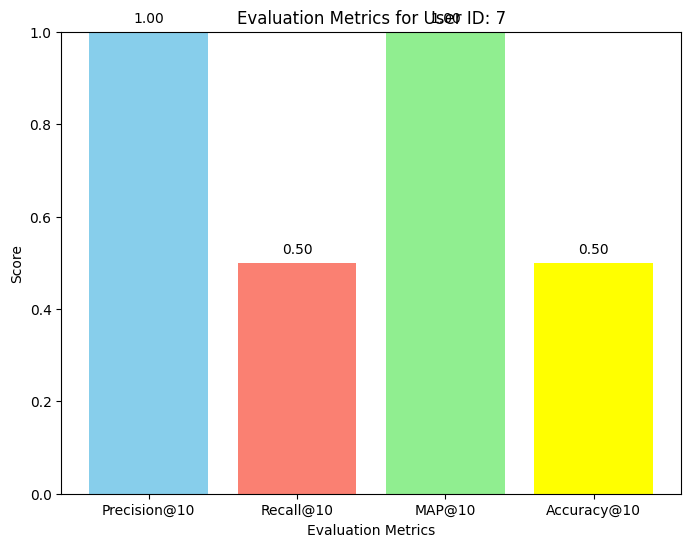

In [41]:
metrics = ['Precision@10', 'Recall@10', 'MAP@10', 'Accuracy@10']
values = [precision, recall, map_score, accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'salmon', 'lightgreen', 'yellow'])
plt.ylim(0, 1)

# Adding labels and title
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.title(f'Evaluation Metrics for User ID: {user_id}')
plt.text(0, precision + 0.02, f'{precision:.2f}', ha='center')
plt.text(1, recall + 0.02, f'{recall:.2f}', ha='center')
plt.text(2, map_score + 0.02, f'{map_score:.2f}', ha='center')
plt.text(3, accuracy + 0.02, f'{accuracy:.2f}', ha='center')

# Display the plot
plt.show()

# Output CSV

In [ ]:
# Generate recommendations for each user
def get_user_recommendations(user_ids, W, H, user_item_matrix, product_df, top_n=10):
    recommendations = []

    for user_id in user_ids:
        # Get recommendations for the current user
        recommended_products = recommend_items(
            user_id=user_id,
            W=W,
            H=H,
            user_item_matrix=user_item_matrix,
            product_df=product_df,
            top_n=top_n
        )

        # Store recommendations in the format: user_id, recommended_shoe_id
        for shoe_id in recommended_products['sepatu_id']:
            recommendations.append({"user_id": user_id, "recommended_shoe_id": shoe_id})

    # Convert recommendations list to DataFrame
    recommendations_df = pd.DataFrame(recommendations)
    return recommendations_df

# Example: generate recommendations for all users in the interaction matrix
user_ids = user_item_matrix.index.tolist()  # List of all user IDs
recommendations_df = get_user_recommendations(user_ids, W, H, user_item_matrix, sepatu_list, top_n=10)

# Save recommendations to CSV
recommendations_df.to_csv("user_recommendations.csv", index=False)
print("User recommendations saved as user_recommendations.csv")


User recommendations saved as user_recommendations.csv
